In [1]:
cd nuprobe

/Users/paulqwert/Documents/nuprobe


In [38]:
ls -lart

total 96
-rw-r--r--  1 paulqwert  staff     40 Jun  3 11:14 __init__.py
-rw-r--r--  1 paulqwert  staff   1440 Jun  3 11:14 degeneracy.py
-rw-r--r--  1 paulqwert  staff   5751 Jun  3 11:14 inputs.py
-rw-r--r--  1 paulqwert  staff    429 Jun  3 11:14 matter.py
-rw-r--r--  1 paulqwert  staff   1415 Jun  3 11:14 params.py
-rw-r--r--  1 paulqwert  staff  19879 Jun  3 11:14 probability.py
-rw-r--r--  1 paulqwert  staff     22 Jun  3 11:14 version.py
drwxr-xr-x@ 9 paulqwert  staff    288 Jun  3 11:32 ../
drwxr-xr-x  9 paulqwert  staff    288 Jun  3 11:35 ./


In [39]:
pip install -e


Usage:   
  /opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

-e option requires 1 argument
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
from nuprobe.inputs import NuSystem, create_U_PMNS, create_alpha
from nuprobe.probability import nuprobe

In [451]:
def get_chi_square(unitary, nonunitary, sigma):
    diff = [nonuni - uni for nonuni, uni in zip(unitary, nonunitary)]
    squared_diff = [d ** 2 for d in diff]
    squared_sd = [(sigma * uni) ** 2 for uni in unitary]
    cs = [sd / ssd for sd, ssd in zip(squared_diff, squared_sd)]
    chi_square_per_dof = sum(cs)/999
    return chi_square_per_dof

In [458]:
def run(x, y):
    t0 = time.time()
    nu_sys = NuSystem(3)
    nu_sys.set_standard_normal()
    nu_sys.set_nonunitary(2, 2, 1-x)
    nu_sys.set_nonunitary(3, 3, 1-y)
    alpha1 = create_alpha(nu_sys.nonunitary.copy())
    
    UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
    U1 = alpha1 @ UPMNS
    
    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 5, num)
    L = 1300
    
    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, U1, antinu=False, const_matter=True, V_NSI=None))
        
#     plt.rc('text', usetex=True)
#     plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath,slashed}"
#     plt.rcParams.update({'figure.autolayout': True})
#     plt.rcParams["figure.figsize"] = (8, 7)
#     plt.rc('font', **{'family' : 'serif', 'size' : 17})

    unitary = PE
    nonunitary = PE1
    
    
    
    return (unitary, nonunitary)

In [456]:
def run1(x, y):
    t0 = time.time()
    nu_sys = NuSystem(3)
    nu_sys.set_standard_normal()
    nu_sys.set_nonunitary(1, 1, x)
    nu_sys.set_nonunitary(3, 3, y)
    alpha1 = create_alpha(nu_sys.nonunitary.copy())
    
    UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
    U1 = alpha1 @ UPMNS
    
    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 5, num)
    L = 1300
    
    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, U1, antinu=False, const_matter=True, V_NSI=None))
        
#     plt.rc('text', usetex=True)
#     plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath,slashed}"
#     plt.rcParams.update({'figure.autolayout': True})
#     plt.rcParams["figure.figsize"] = (8, 7)
#     plt.rc('font', **{'family' : 'serif', 'size' : 17})

    unitary = PE
    nonunitary = PE1
    
    
    
    return (unitary, nonunitary)

In [464]:
all_results = []
for x in np.linspace(0.45, 0, 20):
    for y in np.linspace(0.9999, 0, 20):
        all_results.append((x, y, run(x, y)))

In [461]:
[get_chi_square(unitary, nonunitary, 0.2) for (unitary, nonunitary) in [run(0.45, 0.9999)]]

[5.389173192073879]

In [457]:
[get_chi_square(unitary, nonunitary, 0.2) for (unitary, nonunitary) in [run1(1, 0.1)]]

[0.2581431501936927]

In [465]:
list_x_20 = []
list_y_20 = []
list_x_10 = []
list_y_10 = []
list_x_5 = []
list_y_5 = []
for (x, y, (unitary, nonunitary)) in all_results: 
    if get_chi_square(unitary, nonunitary, 0.2) < 4.61:
        list_x_20.append(x)
        list_y_20.append(y)
    if get_chi_square(unitary, nonunitary, 0.1) < 4.61:
        list_x_10.append(x)
        list_y_10.append(y)
    if get_chi_square(unitary, nonunitary, 0.05) < 4.61:
        list_x_5.append(x)
        list_y_5.append(y)

In [173]:
import os
os.getcwd()

'/Users/paulqwert/Documents'

In [171]:
cd /Users/paulqwert/Documents

/Users/paulqwert/Documents


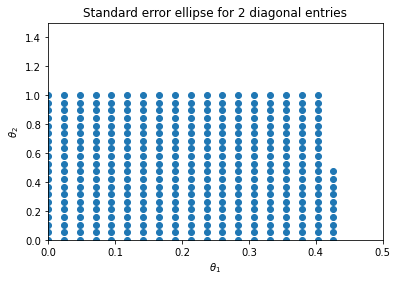

In [466]:
fig = plt.figure()
plt.xlim(0, 0.5)
plt.ylim(0, 1.5)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Standard error ellipse for 2 diagonal entries')
plt.scatter(list_x_20, list_y_20)

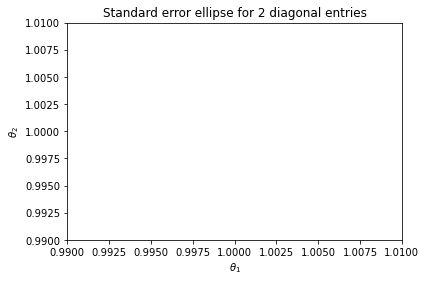

In [463]:
fig = plt.figure()
plt.xlim(0.99, 1.01)
plt.ylim(0.99, 1.01)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Standard error ellipse for 2 diagonal entries')
plt.scatter(list_x_10, list_y_10)
plt.savefig('ellipse_2diag_202020.jpg', format = 'jpg', dpi = 1200)

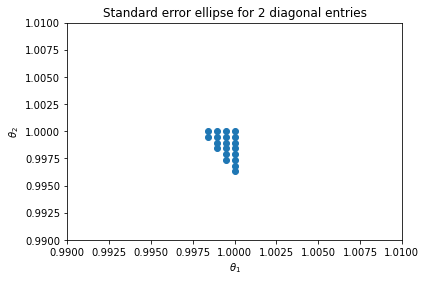

In [182]:
fig = plt.figure()
plt.xlim(0.99, 1.01)
plt.ylim(0.99, 1.01)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Standard error ellipse for 2 diagonal entries')
plt.scatter(list_x_5, list_y_5)
plt.savefig('ellipse_2diag_202020.jpg', format = 'jpg', dpi = 1200)

In [141]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2023/bin/universal-darwin

SyntaxError: EOL while scanning string literal (745537138.py, line 2)

In [577]:
def run(m, p):
    t0 = time.time()
    nu_sys = NuSystem(3)
    nu_sys.set_standard_normal()
    nu_sys.set_nonunitary(2, 3, m*np.exp(np.pi*p*1j))
    alpha1 = create_alpha(nu_sys.nonunitary.copy())
    
    UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
    U1 = alpha1 @ UPMNS
    
    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 5, num)
    L = 1300
    
    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, U1, antinu=False, const_matter=True, V_NSI=None))
        
#     plt.rc('text', usetex=True)
#     plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath,slashed}"
#     plt.rcParams.update({'figure.autolayout': True})
#     plt.rcParams["figure.figsize"] = (8, 7)
#     plt.rc('font', **{'family' : 'serif', 'size' : 17})

    unitary = PE
    nonunitary = PE1
    
    
    
    return (unitary, nonunitary)

In [588]:
for (unitary, nonunitary) in [run(4500, 0.7)]:
    print(get_chi_square(unitary, nonunitary, 0.2))

0.3644018520827549


In [625]:
for p in np.linspace(0, 2, 21):
    for (unitary, nonunitary) in [run(5820, p)]:
        print((p, get_chi_square(unitary, nonunitary, 0.2)))

(0.0, 469.188883751381)
(0.1, nan)
(0.2, nan)
(0.30000000000000004, nan)
(0.4, nan)
(0.5, nan)
(0.6000000000000001, 5069.344189885434)
(0.7000000000000001, 9734.710634444667)
(0.8, nan)
(0.9, nan)
(1.0, 532.4432864446375)
(1.1, 818.6114713161082)
(1.2000000000000002, 555.8531924659579)
(1.3, 168.9643492127624)
(1.4000000000000001, 33.146284829068506)
(1.5, 24.88091226089552)
(1.6, 26.118492501724287)
(1.7000000000000002, 106.41022847502823)
(1.8, 403.9058587927485)
(1.9000000000000001, 662.9601204763583)
(2.0, nan)


In [626]:
all_results_mp = []
for m in np.linspace(0, 5810, 21):
    for p in np.linspace(0, 2, 21):
        all_results_mp.append((m, p, run(m, p)))

In [627]:
list_m_20 = []
list_p_20 = []
list_m_10 = []
list_p_10 = []
list_m_5 = []
list_p_5 = []
for (m, p, (unitary, nonunitary)) in all_results_mp: 
    if get_chi_square(unitary, nonunitary, 0.2) < 4.61:
        list_m_20.append(m)
        list_p_20.append(p)
    if get_chi_square(unitary, nonunitary, 0.1) < 4.61:
        list_m_10.append(m)
        list_p_10.append(p)
    if get_chi_square(unitary, nonunitary, 0.05) < 4.61:
        list_m_5.append(m)
        list_p_5.append(p)

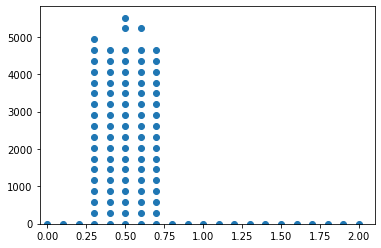

In [633]:
fig = plt.figure()
plt.ylim(-5, 5820)
plt.xlim(-0.05, 2.1)
plt.scatter(list_p_20, list_m_20)

In [5]:
nu_sys = NuSystem(3)
nu_sys.set_standard_normal()
nu_sys.set_nonunitary(2, 3, 1*np.exp(np.pi*1*1j))
alpha1 = create_alpha(nu_sys.nonunitary.copy())
    
UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
U1 = alpha1 @ UPMNS
UPMNS

array([[ 0.8251638 +0.j        ,  0.54487705+0.j        ,
        -0.14461681+0.03605107j],
       [-0.26870191+0.02277344j,  0.60559417+0.01503789j,
         0.74853872+0.j        ],
       [ 0.4959828 +0.01965758j, -0.57962925+0.01298041j,
         0.64612389+0.j        ]])